In [0]:
import pandas as pd
import re
import nltk

from nltk.stem import WordNetLemmatizer

In [0]:
bb = pd.read_csv("../Crawling/billboard_lyrics_1964-2015.csv", engine='python')

In [0]:
del bb["Source"]
del bb["Rank"]

In [0]:
bb.fillna(" ", inplace=True)

In [0]:
bb.head()

,Song,Artist,Year,Lyrics
0,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...
2,i cant get no satisfaction,the rolling stones,1965,
3,you were on my mind,we five,1965,when i woke up this morning you were on my mi...
4,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...


In [0]:
bb.rename(columns={'Song': 'title', 'Artist': 'singer', 'Year':'year', 'Lyrics':'lyrics'}, inplace=True)

In [0]:
bb_2015 = pd.DataFrame(bb[bb.year==2015]).reset_index(drop=True)
bb_2014 = pd.DataFrame(bb[bb.year==2014]).reset_index(drop=True)
bb_2013 = pd.DataFrame(bb[bb.year==2013]).reset_index(drop=True)
bb_2012 = pd.DataFrame(bb[bb.year==2012]).reset_index(drop=True)
bb_2011 = pd.DataFrame(bb[bb.year==2011]).reset_index(drop=True)
bb_2010 = pd.DataFrame(bb[bb.year==2010]).reset_index(drop=True)
bb_2009 = pd.DataFrame(bb[bb.year==2009]).reset_index(drop=True)
bb_2008 = pd.DataFrame(bb[bb.year==2008]).reset_index(drop=True)
bb_2007 = pd.DataFrame(bb[bb.year==2007]).reset_index(drop=True)
bb_2006 = pd.DataFrame(bb[bb.year==2006]).reset_index(drop=True)
bb_2005 = pd.DataFrame(bb[bb.year==2005]).reset_index(drop=True)
bb_2004 = pd.DataFrame(bb[bb.year==2004]).reset_index(drop=True)
bb_2003 = pd.DataFrame(bb[bb.year==2003]).reset_index(drop=True)
bb_2002 = pd.DataFrame(bb[bb.year==2002]).reset_index(drop=True)
bb_2001 = pd.DataFrame(bb[bb.year==2001]).reset_index(drop=True)
bb_2000 = pd.DataFrame(bb[bb.year==2000]).reset_index(drop=True)
bb_1999 = pd.DataFrame(bb[bb.year==1999]).reset_index(drop=True)
bb_1998 = pd.DataFrame(bb[bb.year==1998]).reset_index(drop=True)
bb_1997 = pd.DataFrame(bb[bb.year==1997]).reset_index(drop=True)
bb_1996 = pd.DataFrame(bb[bb.year==1996]).reset_index(drop=True)
bb_1995 = pd.DataFrame(bb[bb.year==1995]).reset_index(drop=True)
bb_1994 = pd.DataFrame(bb[bb.year==1994]).reset_index(drop=True)
bb_1993 = pd.DataFrame(bb[bb.year==1993]).reset_index(drop=True)
bb_1992 = pd.DataFrame(bb[bb.year==1992]).reset_index(drop=True)
bb_1991 = pd.DataFrame(bb[bb.year==1991]).reset_index(drop=True)
bb_1990 = pd.DataFrame(bb[bb.year==1990]).reset_index(drop=True)
bb_1989 = pd.DataFrame(bb[bb.year==1989]).reset_index(drop=True)
bb_1988 = pd.DataFrame(bb[bb.year==1988]).reset_index(drop=True)
bb_1987 = pd.DataFrame(bb[bb.year==1987]).reset_index(drop=True)
bb_1986 = pd.DataFrame(bb[bb.year==1986]).reset_index(drop=True)
bb_1985 = pd.DataFrame(bb[bb.year==1985]).reset_index(drop=True)
bb_1984 = pd.DataFrame(bb[bb.year==1984]).reset_index(drop=True)
bb_1983 = pd.DataFrame(bb[bb.year==1983]).reset_index(drop=True)
bb_1982 = pd.DataFrame(bb[bb.year==1982]).reset_index(drop=True)
bb_1981 = pd.DataFrame(bb[bb.year==1981]).reset_index(drop=True)
bb_1980 = pd.DataFrame(bb[bb.year==1980]).reset_index(drop=True)
bb_1979 = pd.DataFrame(bb[bb.year==1979]).reset_index(drop=True)
bb_1978 = pd.DataFrame(bb[bb.year==1978]).reset_index(drop=True)
bb_1977 = pd.DataFrame(bb[bb.year==1977]).reset_index(drop=True)
bb_1976 = pd.DataFrame(bb[bb.year==1976]).reset_index(drop=True)
bb_1975 = pd.DataFrame(bb[bb.year==1975]).reset_index(drop=True)
bb_1974 = pd.DataFrame(bb[bb.year==1974]).reset_index(drop=True)
bb_1973 = pd.DataFrame(bb[bb.year==1973]).reset_index(drop=True)
bb_1972 = pd.DataFrame(bb[bb.year==1972]).reset_index(drop=True)
bb_1971 = pd.DataFrame(bb[bb.year==1971]).reset_index(drop=True)
bb_1970 = pd.DataFrame(bb[bb.year==1970]).reset_index(drop=True)
bb_1969 = pd.DataFrame(bb[bb.year==1969]).reset_index(drop=True)
bb_1968 = pd.DataFrame(bb[bb.year==1968]).reset_index(drop=True)
bb_1967 = pd.DataFrame(bb[bb.year==1967]).reset_index(drop=True)
bb_1966 = pd.DataFrame(bb[bb.year==1966]).reset_index(drop=True)
bb_1965 = pd.DataFrame(bb[bb.year==1965]).reset_index(drop=True)

In [0]:
bb_year_list = [bb_2015,bb_2014,bb_2013,bb_2012,bb_2011,bb_2010,
                 bb_2009,bb_2008,bb_2007,bb_2006,bb_2005,bb_2004,bb_2003,bb_2002,bb_2001,bb_2000,
                 bb_1999,bb_1998,bb_1997,bb_1996,bb_1995,bb_1994,bb_1993,bb_1992,bb_1991,bb_1990,
                 bb_1989,bb_1988,bb_1987,bb_1986,bb_1985,bb_1984,bb_1983,bb_1982,bb_1981,bb_1980,
                 bb_1979,bb_1978,bb_1977,bb_1976,bb_1975,bb_1974,bb_1973,bb_1972,bb_1971,bb_1970,
                 bb_1969,bb_1968,bb_1967,bb_1966,bb_1965]

In [0]:
for i in bb_year_list:
    for j in range(1, len(i)):
        i["lyrics"][0] += " " + i["lyrics"][j]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
year_lyrics = pd.DataFrame(columns=['year', 'lyrics']).reset_index(drop=True)

In [0]:
num = 0

In [0]:
for i in bb_year_list:
    year_lyrics["year"][num] = i["year"][0]
    year_lyrics["lyrics"][num] = i["lyrics"][0]
    num += 1

In [0]:
one = pd.DataFrame(year_lyrics["year"])

In [0]:
two = pd.DataFrame(year_lyrics["lyrics"])

In [0]:
year_lyrics = pd.concat([one, two], axis=1)

In [0]:
for i in range(len(year_lyrics)):
    year_lyrics.loc[i, 'lyrics'] = re.sub('[^a-zA-Z]', ' ', year_lyrics.loc[i, 'lyrics'])

In [0]:
lemmatizer = WordNetLemmatizer()

In [0]:
stemmer = nltk.stem.SnowballStemmer('english')

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\YONGHA.LEE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YONGHA.LEE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YONGHA.LEE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
bb_str = ''

In [0]:
for i in range(len(year_lyrics)):
    full_stem = year_lyrics.loc[i, 'lyrics'].lower()
    lem_words = lemmatizer.lemmatize(full_stem)
    year_lyrics.loc[i, 'lyrics2'] = lem_words
    
    full_stem = nltk.word_tokenize(full_stem)
    tags_en = nltk.pos_tag(full_stem)
    
    for j in range(len(tags_en)):
        if 'NN' in tags_en[j][1]:
            bb_str = bb_str + tags_en[j][0] + ' '

    year_lyrics.loc[i, 'lyrics3'] = bb_str
    bb_str = ''

In [0]:
#for i in range(len(year_lyrics)):
#    full_stem = year_lyrics.loc[i, 'lyrics'].lower().split()
#    full_stem = nltk.word_tokenize(full_stem)
#    
#    stemmer_words = [stemmer.stem(word) for word in full_stem]
#    stemmer_words = ' '.join(stemmer_words)
#    
#    year_lyrics.loc[i, 'lyrics3'] = stemmer_words

In [0]:
year_lyrics.head()

,year,lyrics,lyrics2,lyrics3
0,2015,this hit that ice cold michelle pfeiffer that...,this hit that ice cold michelle pfeiffer that...,hit ice michelle pfeiffer gold one girls girls...
1,2014,it might seem crazy what im about to say suns...,it might seem crazy what im about to say suns...,shes air balloon i space air i care baby waybe...
2,2013,hook wanz im gonna pop some tags only got twe...,hook wanz im gonna pop some tags only got twe...,hook im gon tags dollars pocket i macklemore w...
3,2012,gotye now and then i think of when we were to...,gotye now and then i think of when we were to...,gotye company ache i kind sadness resignation ...
4,2011,theres a fire starting in my heart reaching a...,theres a fire starting in my heart reaching a...,theres fire starting heart fever pitch dark ve...


In [0]:
df = pd.DataFrame(columns=['year', 'lyrics_lemmatizer'])

In [0]:
df2 = pd.DataFrame(columns=['year', 'lyrics_nouns'])

In [0]:
for i in range(len(year_lyrics)):
    df.loc[i, 'year'] = year_lyrics.loc[i, 'year']
    df.loc[i, 'lyrics_lemmatizer'] = year_lyrics.loc[i, 'lyrics2']
    df2.loc[i, 'year'] = year_lyrics.loc[i, 'year']
    df2.loc[i, 'lyrics_nouns'] = year_lyrics.loc[i, 'lyrics3']

In [0]:
df.to_csv("billboard_lemmatizer.csv", index=False)

In [0]:
df2.to_csv("billboard_nouns.csv", index=False)

In [0]:
#year_lyrics.to_csv("billboard_lyrics.csv", index=False)

In [0]:
df.head()

,year,lyrics_lemmatizer
0,2015,this hit that ice cold michelle pfeiffer that...
1,2014,it might seem crazy what im about to say suns...
2,2013,hook wanz im gonna pop some tags only got twe...
3,2012,gotye now and then i think of when we were to...
4,2011,theres a fire starting in my heart reaching a...


In [0]:
df2.head()

,year,lyrics_nouns
0,2015,hit ice michelle pfeiffer gold one girls girls...
1,2014,shes air balloon i space air i care baby waybe...
2,2013,hook im gon tags dollars pocket i macklemore w...
3,2012,gotye company ache i kind sadness resignation ...
4,2011,theres fire starting heart fever pitch dark ve...


In [0]:
df = pd.read_csv("billboard_lemmatizer.csv")

In [0]:
lemmatizer_str = ''

In [0]:
for i in range(len(df)):
    lemmatizer_str = lemmatizer_str + df.loc[i, 'lyrics_lemmatizer'] + " "

In [0]:
from collections import Counter

In [0]:
count_list = []

In [0]:
words = lemmatizer_str.split(' ')
count = Counter(words)

NameError: name 'lemmatizer_str' is not defined

In [0]:
for w, c in count.most_common(300):
    temp = (w, c)
    count_list.append(temp)

NameError: name 'count' is not defined

In [0]:
from nltk.corpus import stopwords

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YONGHA.LEE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stopwords = nltk.corpus.stopwords.words('english')

In [0]:
stops_list = ['the', 'to']

In [0]:
stops_list = ['', 'the', 'to', 'and', 'a', 'im', 'be', 'of', 'dont', 'is', 'its', 'youre', 'cant', 'aint', 'thats', 'wont', 'theres', 'youll', 'youve', 'whats', 'didnt', 'arent', 'couldnt', 'doesnt', 'didnt', 'theyre', 'got', 'get', 'wouldnt',  'does', 'ima', 'imma', 'o', 'wasnt', 'isnt', 'n', 'youi', 'g', 'mmm', 'di', 'ma', 's', 'ooo', 'y', 'e', 'r', 'x', 'p', 'b', 'd', 'itll', 'i', 'you', 'it', 'your', 'that', 'in', 'on', 'love', 'for', 'this', 'are', 'have', 'so', 'at', 'so', 'gotta', 'was', 'were', 'then', 'bout', 'by', 'too', 'could', 'ive', 'would', 'or', 'some', 'as', 'gon', 'might', 'em', 'did', 'had', 'should', 'into', 'his', 'been', 'had', 'am', 'than', 'those', 'these', 'this', 'one', 'baby', 'know', 'oh', 'yeah', 'cause', 'girl', 'make', 'wanna', 'see', 'let', 'never']

In [0]:
stopwords.extend(stops_list)

In [0]:
df['lyrics_except'] = ''

In [0]:
for i in range(len(df)):
    words = df.loc[i, 'lyrics'].split(' ')
    except_lemmatizer = [w.strip() for w in words if not w.strip() in stopwords]
    except_lemmatizer = ' '.join(except_lemmatizer)
    
    df.loc[i, 'lyrics'] = except_lemmatizer

In [0]:
del df['lyrics_lemmatizer']

In [0]:
df.rename(columns={'lyrics_except':'lyrics'}, inplace=True)

In [0]:
df.to_csv("billboard_except_stopwords(lem).csv")

In [0]:
df2 = pd.read_csv("year_billboard_lyric_stemmed.csv")

In [0]:
df2.head()

,year,lyrics
0,2015,this hit that ice cold michelle pfeiffer that...
1,2014,it might seem crazy what im about to say suns...
2,2013,hook wanz im gonna pop some tags only got twe...
3,2012,gotye now and then i think of when we were to...
4,2011,theres a fire starting in my heart reaching a...


In [0]:
df2['lyrics_except'] = ''

In [0]:
for i in range(len(df2)):
    words = df2.loc[i, 'lyrics'].split(' ')
    except_stemmed = [w.strip() for w in words if not w.strip() in stopwords]
    except_stemmed = ' '.join(except_stemmed)
    
    df2.loc[i, 'lyrics_except'] = except_stemmed

In [0]:
df2.head()

,year,lyrics,lyrics_except
0,2015,this hit that ice cold michelle pfeiffer that...,hit ice cold michelle pfeiffer white gold hood...
1,2014,it might seem crazy what im about to say suns...,seem crazy say sunshine shes take away hot air...
2,2013,hook wanz im gonna pop some tags only got twe...,hook wanz gonna pop tags twenty dollars pocket...
3,2012,gotye now and then i think of when we were to...,gotye think together like said felt happy die ...
4,2011,theres a fire starting in my heart reaching a...,fire starting heart reaching fever pitch bring...


In [0]:
del df2['lyrics']
df2.rename(columns={'lyrics_except':'lyrics'}, inplace=True)
df2.to_csv("billboard_except_stopwords(stem).csv")

In [0]:
for i in range(len(df)):
    f = open(str(df["year"][i]) + ".txt", 'w', encoding='UTF8')
    f.write(df["lyrics"][i])
    f.close()

In [0]:
for i in range(len(df2)):
    f = open(str(df2["year"][i]) + ".txt", 'w', encoding='UTF8')
    f.write(df2["lyrics"][i])
    f.close()

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv("billboard_except_stopwords(lem).csv")

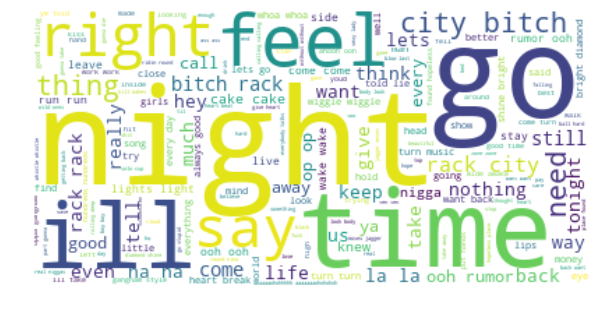

In [0]:
wordcloud = WordCloud(relative_scaling=0.5, background_color="white").generate(df.loc[3, 'lyrics'])
#     wordcloud.to_file(str(year)+"wordcloud.png")
plt.figure(figsize=(10,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
df2 = pd.read_csv("billboard_except_stopwords(stem).csv")

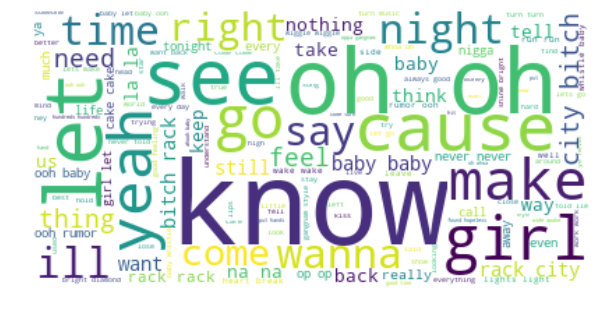

In [0]:
wordcloud = WordCloud(relative_scaling=0.5, background_color="white").generate(df2.loc[3, 'lyrics'])
#     wordcloud.to_file(str(year)+"wordcloud.png")
plt.figure(figsize=(10,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()